S Harisankar | Date: 19-09-22

## Program to implement k-NN classification using telco cust churn dataset and find the accuracy of the algorithm


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
ds=pd.read_csv("datasets/Telco-Customer-Churn.csv")
display(ds)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [48]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## preprocessing

In [49]:
# extracting dependent variable
y=ds['Churn']

ds=ds.drop(['Churn'],axis=1)

In [50]:
ds['TotalCharges']=pd.to_numeric(ds['TotalCharges'],errors='coerce')
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [52]:
#Dropping unimportant column

ds=ds.drop(['customerID'],axis=1)


In [53]:
# encoding categorical data

from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
ds.iloc[:,0]=label_encoder_x.fit_transform(ds.iloc[:,0])
ds.iloc[:,1]=label_encoder_x.fit_transform(ds.iloc[:,1])
ds.iloc[:,2]=label_encoder_x.fit_transform(ds.iloc[:,2])
ds.iloc[:,3]=label_encoder_x.fit_transform(ds.iloc[:,3])
ds.iloc[:,4]=label_encoder_x.fit_transform(ds.iloc[:,4])
ds.iloc[:,5]=label_encoder_x.fit_transform(ds.iloc[:,5])
ds.iloc[:,6]=label_encoder_x.fit_transform(ds.iloc[:,6])
ds.iloc[:,7]=label_encoder_x.fit_transform(ds.iloc[:,7])
ds.iloc[:,8]=label_encoder_x.fit_transform(ds.iloc[:,8])
ds.iloc[:,9]=label_encoder_x.fit_transform(ds.iloc[:,9])
ds.iloc[:,10]=label_encoder_x.fit_transform(ds.iloc[:,10])
ds.iloc[:,11]=label_encoder_x.fit_transform(ds.iloc[:,11])
ds.iloc[:,12]=label_encoder_x.fit_transform(ds.iloc[:,12])
ds.iloc[:,13]=label_encoder_x.fit_transform(ds.iloc[:,13])
ds.iloc[:,14]=label_encoder_x.fit_transform(ds.iloc[:,14])
ds.iloc[:,15]=label_encoder_x.fit_transform(ds.iloc[:,15])
ds.iloc[:,16]=label_encoder_x.fit_transform(ds.iloc[:,16])
ds.iloc[:,17]=label_encoder_x.fit_transform(ds.iloc[:,17])
ds.iloc[:,18]=label_encoder_x.fit_transform(ds.iloc[:,18])
display(ds)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3700
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6304
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157


In [54]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [55]:
#assigning dummy values

z=ds
one_hot_encoding_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling']
z=pd.get_dummies(z,columns=one_hot_encoding_columns)
display(z)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_0,...,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1
0,0,0,1,0,1,0,2,142,74,0,...,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,34,1,3,498,3624,1,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,2,1,3,436,536,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,45,0,0,266,3570,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,2,1,2,729,674,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,3,991,3700,0,...,0,1,0,0,1,0,1,0,0,1
7039,0,0,1,1,72,1,1,1340,6304,0,...,0,1,0,0,1,0,1,0,0,1
7040,0,0,1,1,11,0,2,137,1265,0,...,0,0,1,0,0,1,0,0,0,1
7041,1,1,1,0,4,1,3,795,1157,0,...,0,0,1,0,0,1,0,0,0,1


## splitting into training and testing data

In [56]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=0.25,random_state=0)

## feature scaling

In [57]:

from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


## fitting knn to dataset

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

## predicting result

In [59]:
y_pred=classifier.predict(x_test)
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


## confusion matrix

[[1095  203]
 [ 230  233]]


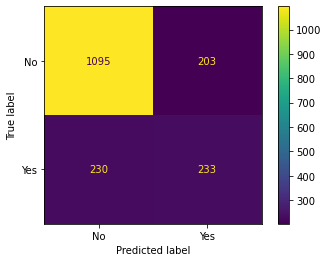

In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

## accuracy

In [61]:
training_score=classifier.score(x_train,y_train)
test_score=classifier.score(x_test,y_test)
print(training_score)
print(test_score)

0.8390761075350246
0.7541169789892107


## different k values...

In [62]:
K = []
training = []
test = []
scores = {}


for k in range(2, 24):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)

    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

## model evaluation

In [63]:
for keys,values in scores.items():
    print(keys,':',values)

2 : [0.8638773191972737, 0.7387847813742192]
3 : [0.8669064748201439, 0.7490062464508802]
4 : [0.8394547519878833, 0.7597955706984668]
5 : [0.8390761075350246, 0.7541169789892107]
6 : [0.8265808405906854, 0.7632027257240205]
7 : [0.8265808405906854, 0.7592277115275412]
8 : [0.8256342294585385, 0.7620670073821693]
9 : [0.8277167739492617, 0.7671777399204998]
10 : [0.8210904960242332, 0.7660420215786485]
11 : [0.8186293070806513, 0.7660420215786485]
12 : [0.8142748958727755, 0.7694491766042022]
13 : [0.8133282847406286, 0.7734241908006815]
14 : [0.8131389625141991, 0.7762634866553095]
15 : [0.8114350624763347, 0.7677455990914254]
16 : [0.8065126845891708, 0.7768313458262351]
17 : [0.8031048845134419, 0.7745599091425327]
18 : [0.8080272624006059, 0.778534923339012]
19 : [0.8023475956077244, 0.7751277683134583]
20 : [0.8015903067020068, 0.778534923339012]
21 : [0.8004543733434305, 0.7745599091425327]
22 : [0.8012116622491481, 0.7745599091425327]
23 : [0.8015903067020068, 0.768313458262351]

# VISUALIZATION


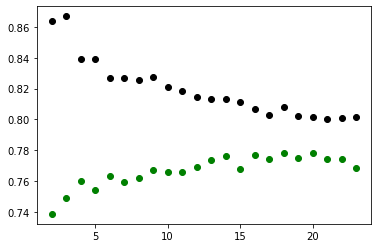

In [64]:
import matplotlib.pyplot as plt
plt.scatter(K,training,color='k')
plt.scatter(K,test,color='g')
plt.show()